In [1]:
# Here is my KNN model from scratch

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [87]:
def KNN(data, duration, loudness, k):
    # 2 dimensional search
    distance = {}
    jazz, rock = 0, 0
    
    for i in range(len(data)):
        distance[i] = ((duration - data.iloc[i,0])**2 + (loudness - data.iloc[i, 1]) ** 2) ** 0.5
    nearest_neighbors = []
    for i in range(k):
        for j in range(len(distance)):
            if distance[j] > 0:
                if distance[j] == min(distance.values()):
                    nearest_neighbors.append(j)
                    distance[j] = max(distance.values())
                    break
    for neighbor in nearest_neighbors:
        if data.iloc[neighbor,2] == 1:
            jazz += 1
        else:
            rock += 1
    if jazz > rock:
        return 1
    elif rock > jazz:
        return 0
    else:
        return 'Tie?'

In [151]:
duration_list = []
loudness_list = []
genre_list = []
for i in range(90, 420, 5):
    for j in range(0, 52, 1):
        duration_list.append(i)
        loudness_list.append(j)
        genre_list.append(KNN(music, i, j, 5))
df = pd.DataFrame()
df['duration'] = duration_list
df['loudness'] = loudness_list
df['genre'] = genre_list

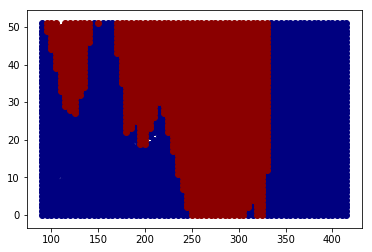

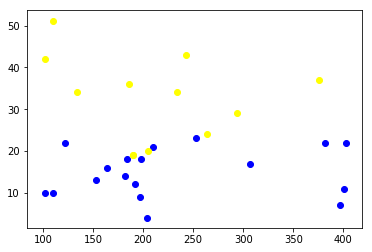

In [154]:
plt.scatter(df.duration[df.genre == 1], df.loudness[df.genre == 1], color='navy')
plt.scatter(df.duration[df.genre == 0], df.loudness[df.genre == 0], color='darkred')
plt.show()
plt.scatter(music.duration[music.jazz == 1], music.loudness[music.jazz == 1], color='blue')
plt.scatter(music.duration[music.jazz == 0], music.loudness[music.jazz == 0], color='yellow')
plt.show()
# This looks a little off because the y and x scales of the graph of off.